In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
# Function to create a new graph
def create_graph():
    # Create an empty graph
    company_graph = nx.DiGraph()

    # Add the company node
    company_graph.add_node("AB Company", type="company")

    # Function to add a client node and edge with service
    def add_client():
        client_name = input("Enter client name: ")
        company_graph.add_node(client_name, type="client")
        print("Select a service:")
        for i, service in enumerate(SERVICES, start=1):
            print(f"{i}. {service}")
        service_index = int(input("Enter the number corresponding to the service: ")) - 1
        company_graph.add_edge(client_name, "AB Company", service=SERVICES[service_index])

    # Get user input to add client nodes and edges
    while True:
        add_more_clients = input("Do you want to add a client? (y/n): ").lower()
        if add_more_clients == "n":
            break
        elif add_more_clients == "y":
            add_client()
        else:
            print("Invalid input. Please enter 'y for yes' or 'n for no'.")

    return company_graph

In [3]:
# Function to save the graph to a file
def save_graph(graph, filename):
    nx.write_gexf(graph, filename)
    print(f"Graph saved to {filename}")

# Function to load a graph from a file
def load_graph(filename):
    if os.path.exists(filename):
        return nx.read_gexf(filename)
    else:
        print(f"No graph file found at {filename}. Creating a new graph.")
        return create_graph()

In [4]:
# Function to draw and display the graph
def draw_and_display_graph(graph):
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10)
    edge_labels = nx.get_edge_attributes(graph, 'service')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.show()

In [5]:
# Main function
def main():
    global SERVICES
    SERVICES = ["Online Business", "Human Resource", "Market Research", "Business Strategy",
                "Project Management", "Money Management", "Online Marketing", "Business Insurance"]

    choice = input("Do you want to create a new graph (enter 'New') or use a saved graph (enter 'Load')? ").capitalize()
    if choice == "New":
        company_graph = create_graph()
    elif choice == "Load":
        filename = input("Enter the filename to load the graph from: ")
        company_graph = load_graph(filename)
    else:
        print("Invalid choice. Please enter 'New' or 'Load'.")
        return

    save_choice = input("Do you want to save this graph? (y/n): ").lower()
    if save_choice == "y":
        save_filename = input("Enter the filename to save the graph: ")
        save_graph(company_graph, save_filename)

    draw_and_display_graph(company_graph)

Do you want to create a new graph (enter 'New') or use a saved graph (enter 'Load')? New
Do you want to add a client? (y/n): y
Enter client name: Client 1
Select a service:
1. Online Business
2. Human Resource
3. Market Research
4. Business Strategy
5. Project Management
6. Money Management
7. Online Marketing
8. Business Insurance
Enter the number corresponding to the service: 1
Do you want to add a client? (y/n): y
Enter client name: Client 2
Select a service:
1. Online Business
2. Human Resource
3. Market Research
4. Business Strategy
5. Project Management
6. Money Management
7. Online Marketing
8. Business Insurance
Enter the number corresponding to the service: 2
Do you want to add a client? (y/n): y
Enter client name: Client 3
Select a service:
1. Online Business
2. Human Resource
3. Market Research
4. Business Strategy
5. Project Management
6. Money Management
7. Online Marketing
8. Business Insurance
Enter the number corresponding to the service: 3
Do you want to add a client? 

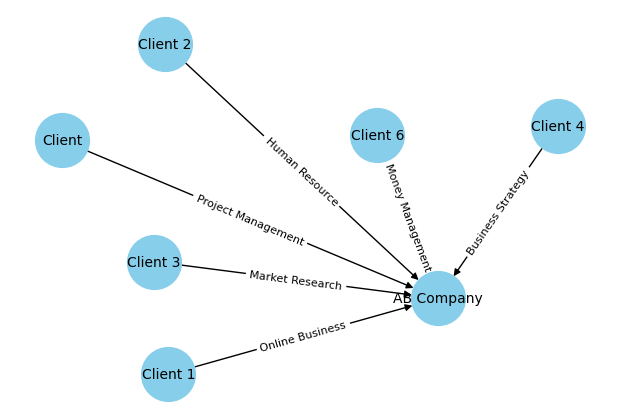

In [6]:
if __name__ == "__main__":
    main()